In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
cutoff=0.6

In [3]:
data=pd.read_csv("surra.csv")

In [4]:
data['Gender'] = pd.Series(random.choices(['F','M'], weights=[50.74, 49.26], k=len(data)))
data['Age'] = pd.Series(random.choices([1,2,3], weights=[1.18, 55, 43.82], k=len(data)))
data['Color'] = pd.Series(random.choices(["bay", "br", "chestnut","dark brown","dun","gr"], weights=[59.88, 0.29, 22.12,14.75,0.29,2.65], k=len(data)))
data.head()

,City,Year,Name,ELISA,PCR,Farm,Gender,Age,Color
0,Calcutta,2013,Cal1,0.179,NaN,Dashmesh Stud Farm,M,3,dark brown
1,Calcutta,2013,Cal2,0.291,NaN,Dashmesh Stud Farm,M,3,dark brown
2,Calcutta,2013,Cal3,0.196,NaN,Dashmesh Stud Farm,M,2,dark brown
3,Calcutta,2013,Cal4,0.227,NaN,Dashmesh Stud Farm,F,2,chestnut
4,Calcutta,2013,Cal5,0.281,NaN,Dashmesh Stud Farm,M,2,bay


In [5]:
data['Result'] = np.select([(data["ELISA"]<cutoff),(data["ELISA"]>=cutoff)], [0,1])
data.head()

,City,Year,Name,ELISA,PCR,Farm,Gender,Age,Color,Result
0,Calcutta,2013,Cal1,0.179,NaN,Dashmesh Stud Farm,M,3,dark brown,0
1,Calcutta,2013,Cal2,0.291,NaN,Dashmesh Stud Farm,M,3,dark brown,0
2,Calcutta,2013,Cal3,0.196,NaN,Dashmesh Stud Farm,M,2,dark brown,0
3,Calcutta,2013,Cal4,0.227,NaN,Dashmesh Stud Farm,F,2,chestnut,0
4,Calcutta,2013,Cal5,0.281,NaN,Dashmesh Stud Farm,M,2,bay,0


In [6]:
idx=data.iloc[:,0:3]
index=pd.MultiIndex.from_frame(idx)
index

MultiIndex([( 'Calcutta', 2013,   'Cal1'),
            ( 'Calcutta', 2013,   'Cal2'),
            ( 'Calcutta', 2013,   'Cal3'),
            ( 'Calcutta', 2013,   'Cal4'),
            ( 'Calcutta', 2013,   'Cal5'),
            ( 'Calcutta', 2013,   'Cal6'),
            ( 'Calcutta', 2013,   'Cal7'),
            ( 'Calcutta', 2013,   'Cal8'),
            ( 'Calcutta', 2013,   'Cal9'),
            ( 'Calcutta', 2013,  'Cal10'),
            ...
            ('Hyderabad', 2014, 'HRC334'),
            ('Hyderabad', 2014, 'HRC335'),
            ('Hyderabad', 2014, 'HRC336'),
            ('Hyderabad', 2014, 'HRC337'),
            ('Hyderabad', 2014, 'HRC338'),
            ('Hyderabad', 2014, 'HRC339'),
            ('Hyderabad', 2014, 'HRC340'),
            ('Hyderabad', 2014, 'HRC341'),
            ('Hyderabad', 2014, 'HRC342'),
            ('Hyderabad', 2014, 'HRC343')],
           names=['City', 'Year', 'Name'], length=5814)

In [7]:
df=data.iloc[:,2:].set_index(index)
df.head()

Name  ELISA  PCR                Farm Gender  Age  \
City     Year Name                                                     
Calcutta 2013 Cal1  Cal1  0.179  NaN  Dashmesh Stud Farm      M    3   
              Cal2  Cal2  0.291  NaN  Dashmesh Stud Farm      M    3   
              Cal3  Cal3  0.196  NaN  Dashmesh Stud Farm      M    2   
              Cal4  Cal4  0.227  NaN  Dashmesh Stud Farm      F    2   
              Cal5  Cal5  0.281  NaN  Dashmesh Stud Farm      M    2   

                         Color  Result  
City     Year Name                      
Calcutta 2013 Cal1  dark brown       0  
              Cal2  dark brown       0  
              Cal3  dark brown       0  
              Cal4    chestnut       0  
              Cal5         bay       0

In [8]:
print("Total Samples:", len(data))
print(data.groupby('Result').size())

Total Samples: 5814
Result
0    5442
1     372
dtype: int64


<AxesSubplot:ylabel='None'>

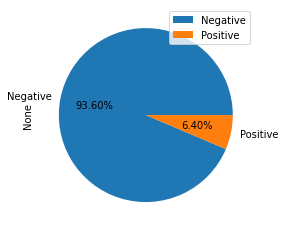

In [9]:
data.groupby('Result').size().plot(kind='pie', legend=True, labels=["Negative","Positive"], autopct='%1.2f%%')

In [10]:
print("Total Samples:", len(data))
df.groupby("City").size()

Total Samples: 5814


City
Bangalore     511
Calcutta      689
Delhi         443
Hyderabad    1307
Madras       1433
Pune         1431
dtype: int64

<AxesSubplot:ylabel='None'>

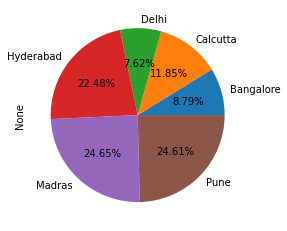

In [11]:
#Area Wise
df.groupby("City").size().plot(kind='pie', autopct='%1.2f%%')

In [12]:
pos = lambda col : col[col>=cutoff].count()
neg = lambda col : col[col<cutoff].count()

array([<AxesSubplot:ylabel='Bangalore'>, <AxesSubplot:ylabel='Calcutta'>,
       <AxesSubplot:ylabel='Delhi'>, <AxesSubplot:ylabel='Hyderabad'>,
       <AxesSubplot:ylabel='Madras'>, <AxesSubplot:ylabel='Pune'>],
      dtype=object)

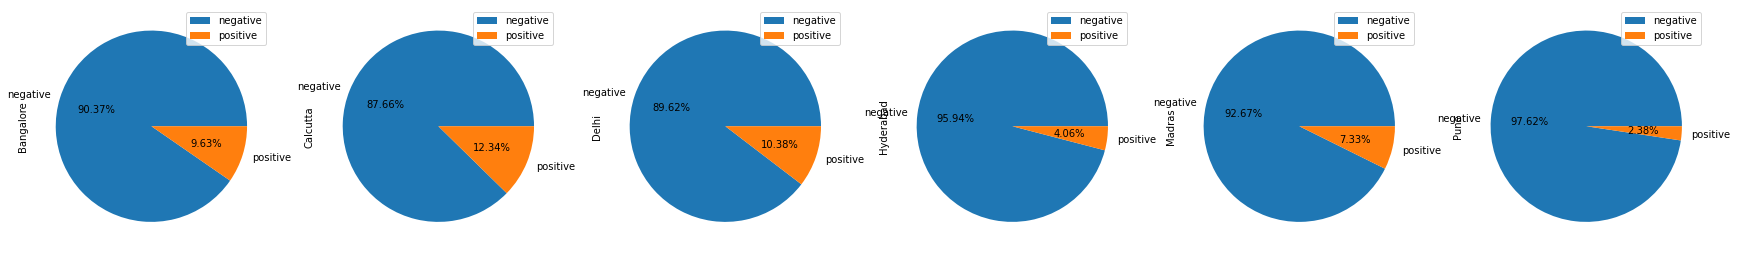

In [13]:
d = data.groupby(data['City'])
city_wise= d['ELISA'].agg([('negative', neg),
                         ('positive', pos)])
city_wise.T.plot.pie(subplots=True, figsize=(30, 10), autopct='%1.2f%%')


In [14]:
print("Total Samples:", len(data))
df.groupby("Year").size()

Total Samples: 5814


Year
2013     933
2014    1697
2017    2257
2018     927
dtype: int64

<AxesSubplot:ylabel='None'>

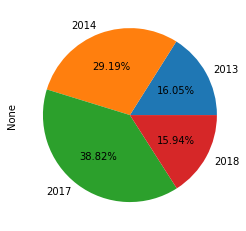

In [15]:
data.groupby("Year").size().plot(kind='pie', autopct='%1.2f%%')

array([<AxesSubplot:ylabel='2013'>, <AxesSubplot:ylabel='2014'>,
       <AxesSubplot:ylabel='2017'>, <AxesSubplot:ylabel='2018'>],
      dtype=object)

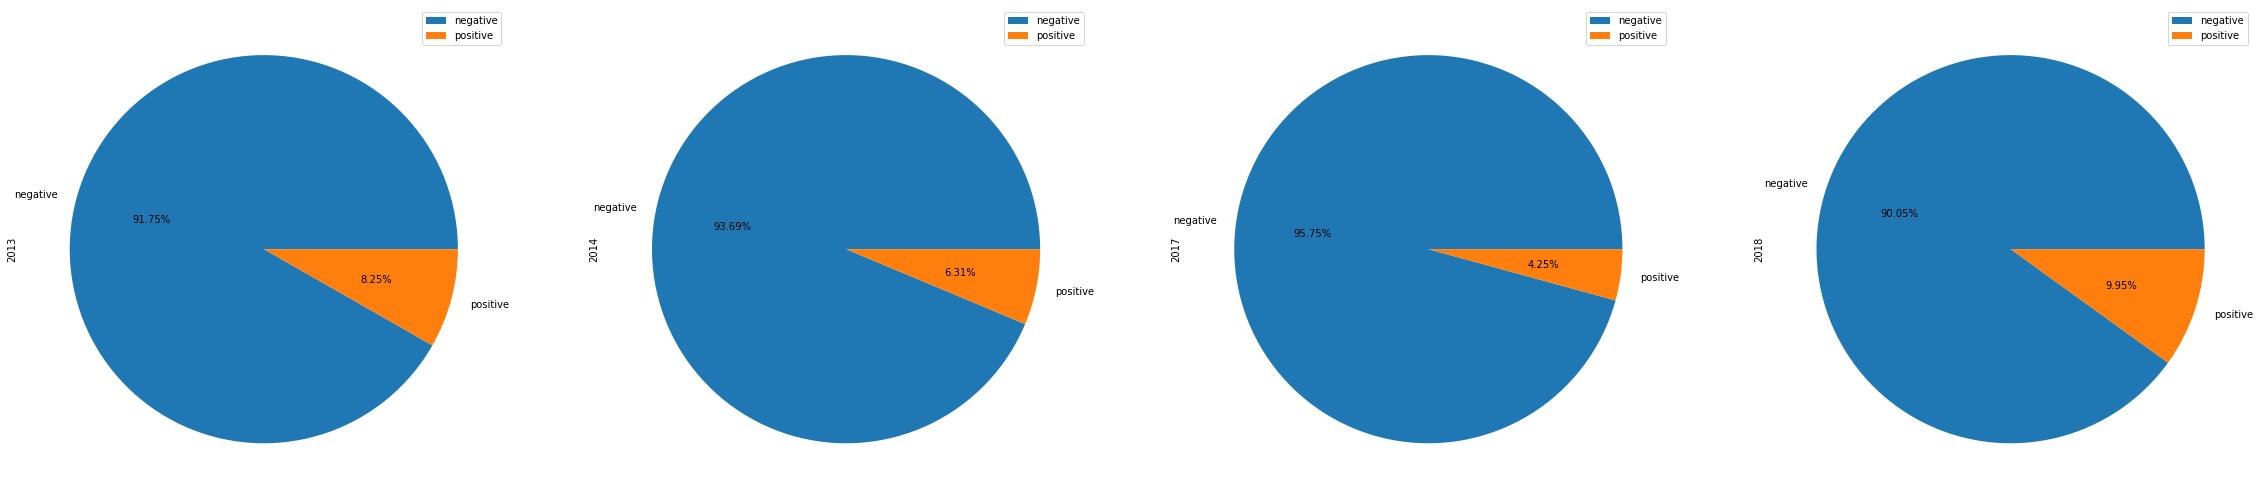

In [16]:
y = data.groupby(data['Year'])
year_wise= y['ELISA'].agg([('negative', neg),
                         ('positive', pos)
                         ])
year_wise.T.plot.pie(subplots=True, figsize=(40, 20), autopct='%1.2f%%')

In [17]:
print("Total Samples:", len(data))
df.groupby("Gender").size()

Total Samples: 5814


Gender
F    2941
M    2873
dtype: int64

<AxesSubplot:ylabel='None'>

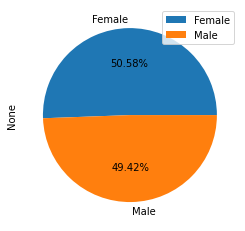

In [18]:
data.groupby('Gender').size().plot(kind='pie', legend=True, labels=["Female","Male"], autopct='%1.2f%%')

array([<AxesSubplot:ylabel='F'>, <AxesSubplot:ylabel='M'>], dtype=object)

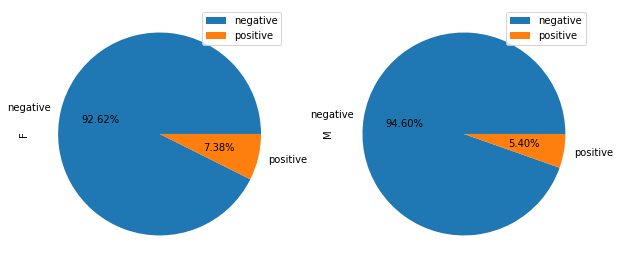

In [19]:
g=data.groupby(data['Gender'])

gender_wise= g['ELISA'].agg([('negative', neg),
                         ('positive', pos)
                         ])
gender_wise.T.plot.pie(subplots=True, figsize=(10, 10), autopct='%1.2f%%')

In [20]:
print("Total Samples:", len(data))
df.groupby("Age").size()

Total Samples: 5814


Age
1      86
2    3211
3    2517
dtype: int64

<AxesSubplot:ylabel='None'>

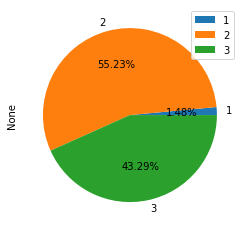

In [21]:
data.groupby('Age').size().plot(kind='pie', legend=True, autopct='%1.2f%%')

[[  79    7]
 [2999  210]
 [2362  155]]
          0         1
1  0.918605  0.081395
2  0.933977  0.065400
3  0.938419  0.061581


<AxesSubplot:>

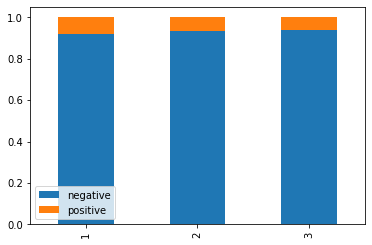

In [67]:
a=data.groupby(data['Age'])
a_wise= a['ELISA'].agg([('negative', neg),
                         ('positive', pos)
                          ])
positive=a_wise.to_numpy(dtype=int)
print(positive)
total = [[86],[3211],[2517]]
norm=positive/total
s = pd.Series([1, 2, 3])
z=pd.DataFrame(norm,s)
print(z)
z.rename(columns={0:'negative', 1:'positive'},  inplace = True)
z.plot.bar(stacked=True)

array([<AxesSubplot:ylabel='1'>, <AxesSubplot:ylabel='2'>,
       <AxesSubplot:ylabel='3'>], dtype=object)

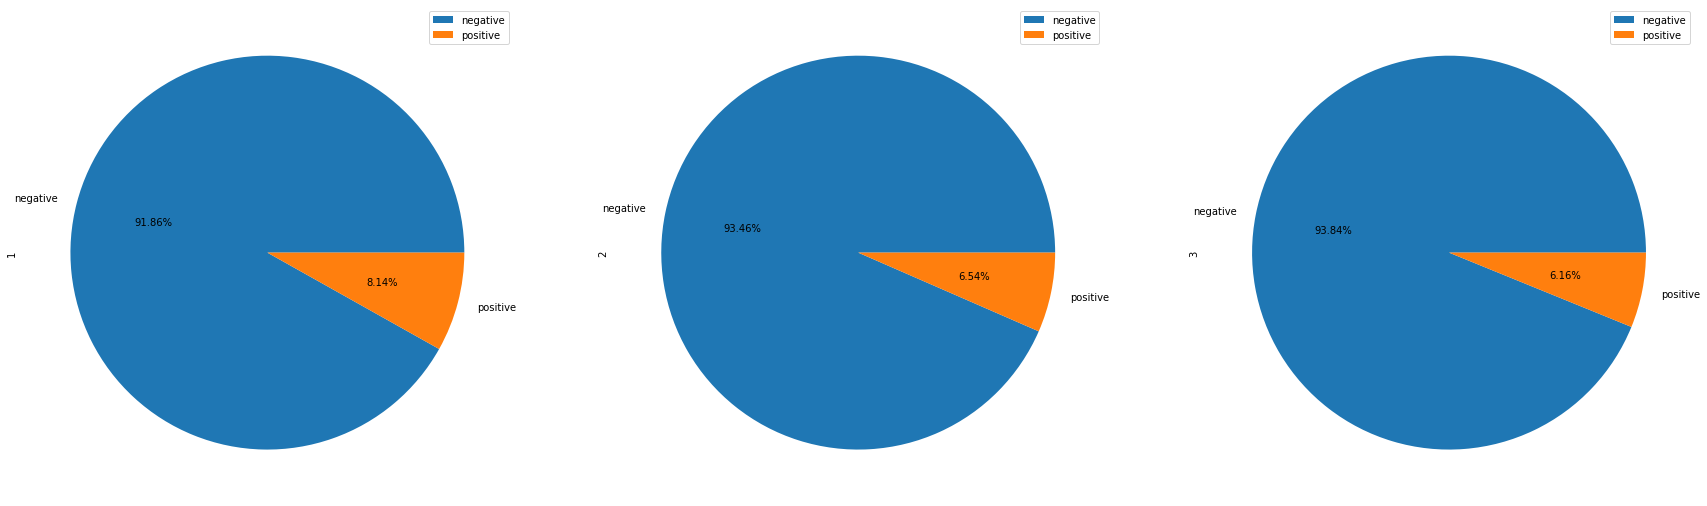

In [68]:
a=data.groupby(data['Age'])
age_wise= a['ELISA'].agg([('negative', neg),
                         ('positive', pos)
                         ])
age_wise.T.plot.pie(subplots=True, figsize=(30, 10), autopct='%1.2f%%')

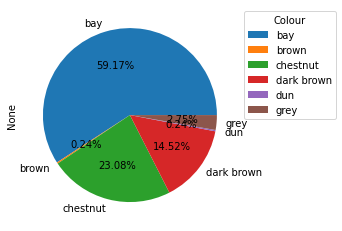

In [83]:
labels=["bay", "brown", "chestnut","dark brown","dun","grey"]
data.groupby('Color').size().plot(kind='pie', labels=labels, legend=True, autopct='%1.2f%%')
plt.legend(title="Colour", labels=labels, bbox_to_anchor=(1,1))

In [2]:
c=data.groupby(data['Color'])
c_wise= c['ELISA'].agg([('negative', neg),
                         ('positive', pos)
                         ])
c_wise.T.plot.pie(subplots=True, figsize=(30, 10), autopct='%1.2f%%')
positive=c_wise.to_numpy(dtype=int)
print(positive)

NameError: name 'data' is not defined

In [70]:
data.groupby('Color').size()

Color
bay           3440
br              14
chestnut      1342
dark brown     844
dun             14
gr             160
dtype: int64

In [1]:
total=[[3440],[14],[1342],[844],[14],[160]]
norm=positive/total
s = pd.Series(["bay", "brown", "chestnut","dark brown","dun","grey"])
z=pd.DataFrame(norm,s)
print(z)
z.rename(columns={0:'negative', 1:'positive'},  inplace = True)
# z.drop(["br","dun","gr"], axis=0, inplace=True)
z.plot.bar(stacked=True)

NameError: name 'positive' is not defined

In [28]:
data.groupby(['City','Year']).size()

City       Year
Bangalore  2013     200
           2014     133
           2018     178
Calcutta   2013     193
           2017     410
           2018      86
Delhi      2014     400
           2018      43
Hyderabad  2013     540
           2014     458
           2018     309
Madras     2014     706
           2017     674
           2018      53
Pune       2017    1173
           2018     258
dtype: int64

In [29]:
total=[ [200],  [133],  [178], [193],  [410],   [86],  [400],   [43],
         [540],  [458],  [309],  [706],  [674],   [53], [1173],  [258]]

                positive
City      Year          
Bangalore 2013      21.0
          2014       6.0
          2018      22.0
Calcutta  2013      46.0
          2017      29.0
          2018      10.0
Delhi     2014      43.0
          2018       3.0
Hyderabad 2013      10.0
          2014      14.0
          2018      29.0
Madras    2014      44.0
          2017      54.0
          2018       7.0
Pune      2017      13.0
          2018      21.0


<AxesSubplot:xlabel='City'>

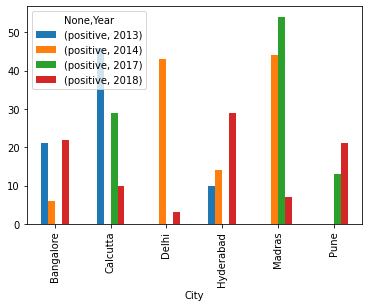

In [30]:
x=data.groupby(['City','Year'])
x_wise=x['ELISA'].agg([('positive', pos)])
s_wise=x['ELISA'].agg([('negative', neg),('positive', pos)])
print(x_wise)
positive=x_wise.to_numpy(dtype=int)
da=s_wise.to_numpy(dtype=int)
# x_wise.plot.bar(subplots=True, figsize=(200, 100))
x_wise.unstack().plot(kind='bar')

                    norm
City      Year          
Bangalore 2013  0.105000
          2014  0.045113
          2018  0.123596
Calcutta  2013  0.238342
          2017  0.070732
          2018  0.116279
Delhi     2014  0.107500
          2018  0.069767
Hyderabad 2013  0.018519
          2014  0.030568
          2018  0.093851
Madras    2014  0.062323
          2017  0.080119
          2018  0.132075
Pune      2017  0.011083
          2018  0.081395


<AxesSubplot:xlabel='City'>

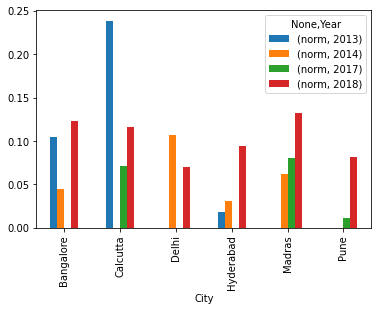

In [31]:
norm=positive/total
z=pd.DataFrame(norm)
z.rename(columns={0:'norm'}, inplace = True)
arr = [
    ["Bangalore", "Bangalore", "Bangalore", "Calcutta", "Calcutta","Calcutta","Delhi","Delhi",
     "Hyderabad","Hyderabad","Hyderabad","Madras","Madras","Madras","Pune","Pune"],
    ["2013", "2014", "2018",  "2013", "2017", "2018","2014", "2018", "2013", "2014", "2018",
      "2014", "2017", "2018", "2017","2018"],
]
tuples = list(zip(*arr))
idx = pd.MultiIndex.from_tuples(tuples, names=["City", "Year"])
dataf=z.set_index(idx)
print(dataf)
dataf.unstack().plot(kind='bar')

                negative  positive
City      Year                    
Bangalore 2013  0.895000  0.105000
          2014  0.954887  0.045113
          2018  0.865169  0.123596
Calcutta  2013  0.761658  0.238342
          2017  0.929268  0.070732
          2018  0.883721  0.116279
Delhi     2014  0.892500  0.107500
          2018  0.930233  0.069767
Hyderabad 2013  0.981481  0.018519
          2014  0.969432  0.030568
          2018  0.906149  0.093851
Madras    2014  0.937677  0.062323
          2017  0.919881  0.080119
          2018  0.867925  0.132075
Pune      2017  0.988917  0.011083
          2018  0.918605  0.081395


<AxesSubplot:xlabel='City,Year'>

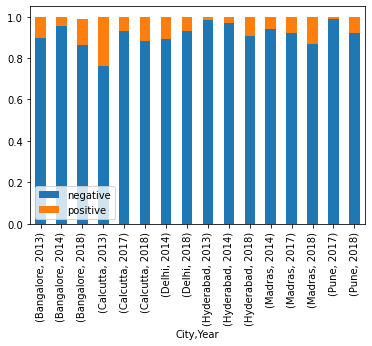

In [32]:
normalize=da/total
z2=pd.DataFrame(normalize)
z2.rename(columns={0:'negative',1:'positive'}, inplace = True)
tuples = list(zip(*arr))
idx = pd.MultiIndex.from_tuples(tuples, names=["City", "Year"])
dataf2=z2.set_index(idx)
print(dataf2)
dataf2.plot(kind='bar',stacked=True)

array([<AxesSubplot:title={'center':'norm'}, xlabel='Year'>], dtype=object)

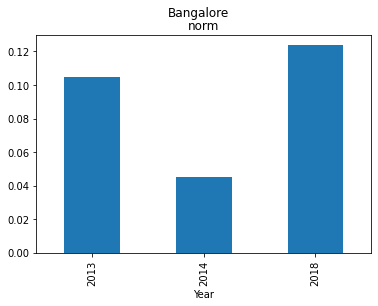

In [33]:
dataf.keys()
y=dataf['norm'].Bangalore
y.plot.bar(subplots=True, title='Bangalore')

<AxesSubplot:title={'center':'Bangalore'}, xlabel='Year'>

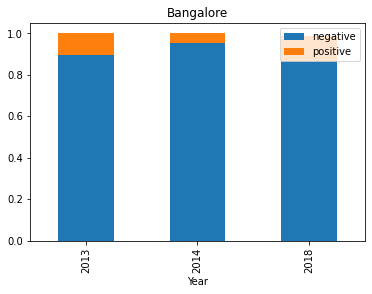

In [34]:
dataf2.keys()
y1=dataf2['negative'].Bangalore
y2=dataf2['positive'].Bangalore
y = pd.merge(y1, y2, how='inner', left_on = 'Year', right_on = 'Year')
y.plot.bar(stacked=True, title='Bangalore')

array([<AxesSubplot:title={'center':'Number of positive samples'}, xlabel='Year'>],
      dtype=object)

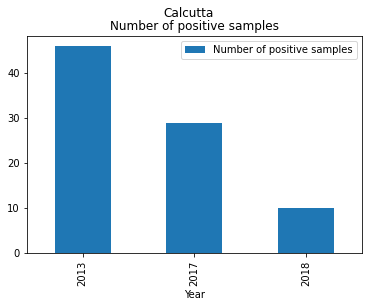

In [35]:
y=data.loc[data['City']=='Calcutta']
x=y.groupby(['Year'])
x_wise=x['ELISA'].agg([('Number of positive samples', pos)])
x_wise.plot.bar(subplots=True, title='Calcutta')

array([<AxesSubplot:title={'center':'norm'}, xlabel='Year'>], dtype=object)

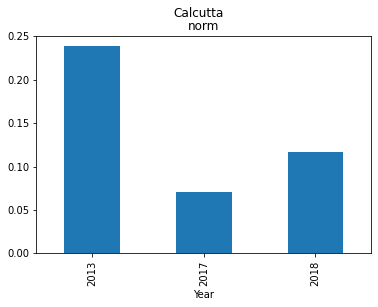

In [36]:
y=dataf['norm'].Calcutta
y.plot.bar(subplots=True, title='Calcutta')

<AxesSubplot:title={'center':'Calcutta'}, xlabel='Year'>

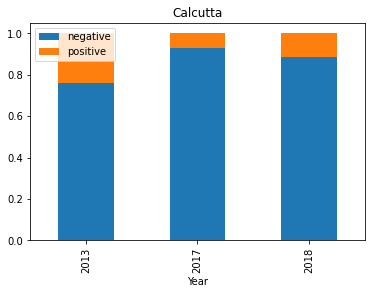

In [37]:
dataf2.keys()
y1=dataf2['negative'].Calcutta
y2=dataf2['positive'].Calcutta
y = pd.merge(y1, y2, how='inner', left_on = 'Year', right_on = 'Year')
y.plot.bar(stacked=True, title='Calcutta')

array([<AxesSubplot:title={'center':'Number of positive samples'}, xlabel='Year'>],
      dtype=object)

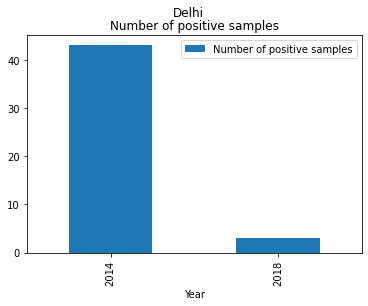

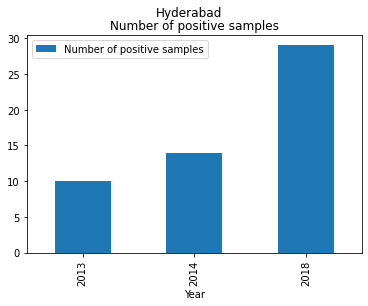

In [38]:
y=data.loc[data['City']=='Delhi']
x=y.groupby(['Year'])
x_wise=x['ELISA'].agg([('Number of positive samples', pos)])
x_wise.plot.bar(subplots=True, title='Delhi')

y=data.loc[data['City']=='Hyderabad']
x=y.groupby(['Year'])
x_wise=x['ELISA'].agg([('Number of positive samples', pos)])
x_wise.plot.bar(subplots=True, title='Hyderabad')

array([<AxesSubplot:title={'center':'Number of positive samples'}, xlabel='Year'>],
      dtype=object)

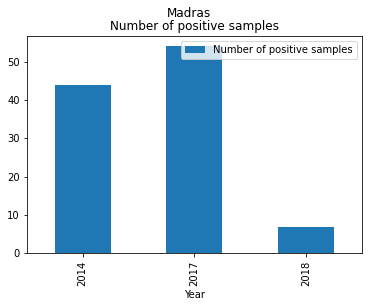

In [39]:
y=data.loc[data['City']=='Madras']
x=y.groupby(['Year'])
x_wise=x['ELISA'].agg([('Number of positive samples', pos)])
x_wise.plot.bar(subplots=True, title='Madras')

array([<AxesSubplot:title={'center':'Number of positive samples'}, xlabel='Year'>],
      dtype=object)

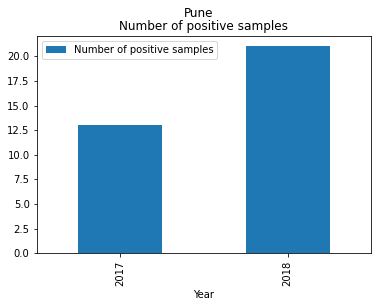

In [40]:
y=data.loc[data['City']=='Pune']
x=y.groupby(['Year'])
x_wise=x['ELISA'].agg([('Number of positive samples', pos)])
x_wise.plot.bar(subplots=True, title='Pune')

array([<AxesSubplot:title={'center':'norm'}, xlabel='Year'>], dtype=object)

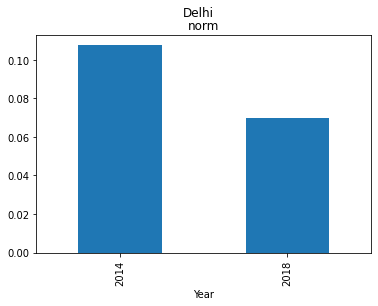

In [41]:
y=dataf['norm'].Delhi
y.plot.bar(subplots=True, title='Delhi')

<AxesSubplot:title={'center':'Delhi'}, xlabel='Year'>

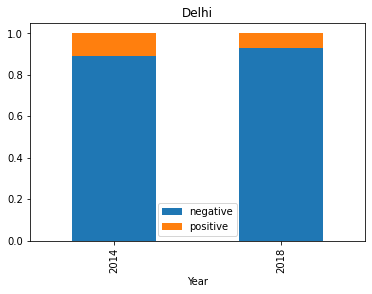

In [42]:
dataf2.keys()
y1=dataf2['negative'].Delhi
y2=dataf2['positive'].Delhi
y = pd.merge(y1, y2, how='inner', left_on = 'Year', right_on = 'Year')
y.plot.bar(stacked=True, title='Delhi')

array([<AxesSubplot:title={'center':'norm'}, xlabel='Year'>], dtype=object)

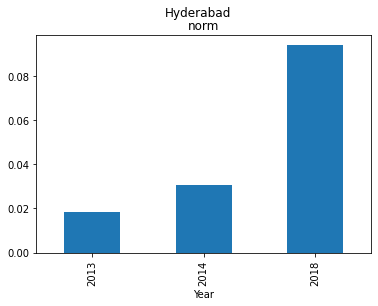

In [43]:
y=dataf['norm'].Hyderabad
y.plot.bar(subplots=True, title='Hyderabad')

<AxesSubplot:title={'center':'Hyderabad'}, xlabel='Year'>

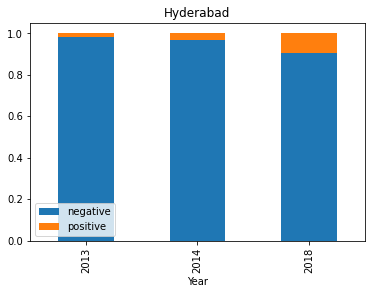

In [44]:
dataf2.keys()
y1=dataf2['negative'].Hyderabad
y2=dataf2['positive'].Hyderabad
y = pd.merge(y1, y2, how='inner', left_on = 'Year', right_on = 'Year')
y.plot.bar(stacked=True, title='Hyderabad')

array([<AxesSubplot:title={'center':'norm'}, xlabel='Year'>], dtype=object)

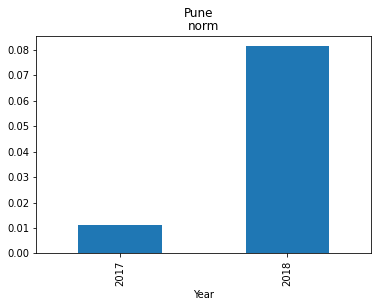

In [45]:
y=dataf['norm'].Pune
y.plot.bar(subplots=True, title='Pune')

<AxesSubplot:title={'center':'Pune'}, xlabel='Year'>

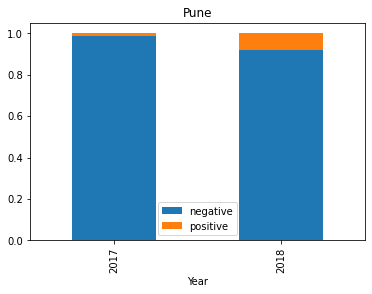

In [46]:
dataf2.keys()
y1=dataf2['negative'].Pune
y2=dataf2['positive'].Pune
y = pd.merge(y1, y2, how='inner', left_on = 'Year', right_on = 'Year')
y.plot.bar(stacked=True, title='Pune')

array([<AxesSubplot:title={'center':'norm'}, xlabel='Year'>], dtype=object)

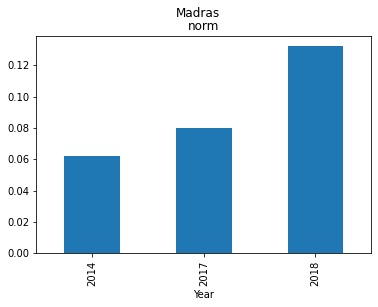

In [47]:
y=dataf['norm'].Madras
y.plot.bar(subplots=True, title='Madras')

<AxesSubplot:title={'center':'Madras'}, xlabel='Year'>

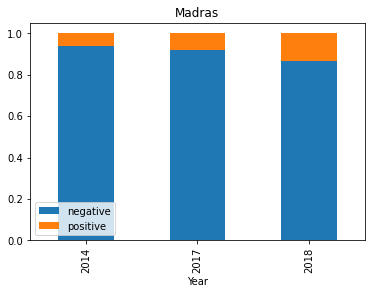

In [48]:
dataf2.keys()
y1=dataf2['negative'].Madras
y2=dataf2['positive'].Madras
y = pd.merge(y1, y2, how='inner', left_on = 'Year', right_on = 'Year')
y.plot.bar(stacked=True, title='Madras')

In [49]:
hyd = data.iloc[5640:5980,:]
hyd.head()

,City,Year,Name,ELISA,PCR,Farm,Gender,Age,Color,Result
5640,Hyderabad,2014,H271,0.4500,NaN,NaN,M,1,dark brown,0
5641,Hyderabad,2014,H272,0.4169,NaN,NaN,F,2,chestnut,0
5642,Hyderabad,2014,H273,0.4451,NaN,NaN,F,2,bay,0
5643,Hyderabad,2014,H274,0.4566,NaN,NaN,F,2,dark brown,0
5644,Hyderabad,2014,H275,0.3105,NaN,NaN,M,3,chestnut,0


In [50]:
hyd=pd.read_csv("hyd-13.csv")
hyd.head()

,City,Year,Name,ELISA,Gender,Age,Color,Result
0,Hyderabad,2013,HRC P 1,0.427,f,1,dun,0
1,Hyderabad,2013,HRC P 4,0.516,f,1,b,1
2,Hyderabad,2013,HRC P 6,0.411,m,1,b,0
3,Hyderabad,2013,HRC P 7,0.368,m,2,b,0
4,Hyderabad,2013,HRC P 12,0.386,m,1,NaN,0


<AxesSubplot:ylabel='None'>

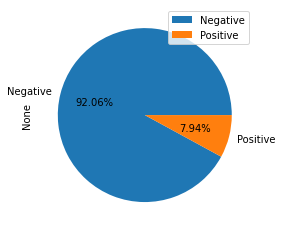

In [51]:
hyd.groupby('Result').size().plot(kind='pie', legend=True, labels=["Negative","Positive"], autopct='%1.2f%%')

<AxesSubplot:ylabel='None'>

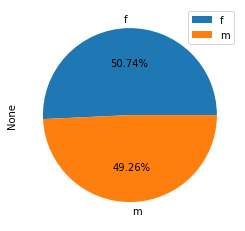

In [52]:
hyd.groupby('Gender').size().plot(kind='pie', legend=True, autopct='%1.2f%%')

<AxesSubplot:ylabel='None'>

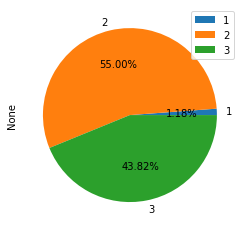

In [53]:
hyd.groupby('Age').size().plot(kind='pie', legend=True, autopct='%1.2f%%')

array([<AxesSubplot:ylabel='f'>, <AxesSubplot:ylabel='m'>], dtype=object)

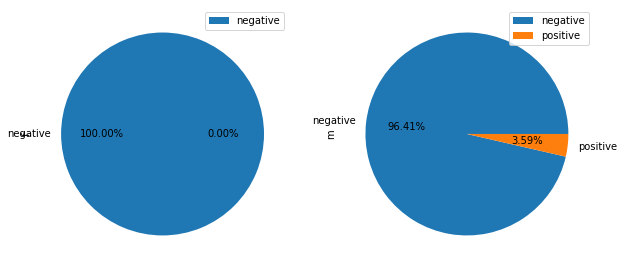

In [54]:
g=hyd.groupby(hyd['Gender'])
gender_wise= g['ELISA'].agg([('negative', neg),
                         ('positive', pos)
                         ])
gender_wise.T.plot.pie(subplots=True, figsize=(10, 10), autopct='%1.2f%%')

     negative  positive
Age                    
1         4.0       0.0
2       183.0       4.0
3       147.0       2.0


array([<AxesSubplot:ylabel='1'>, <AxesSubplot:ylabel='2'>,
       <AxesSubplot:ylabel='3'>], dtype=object)

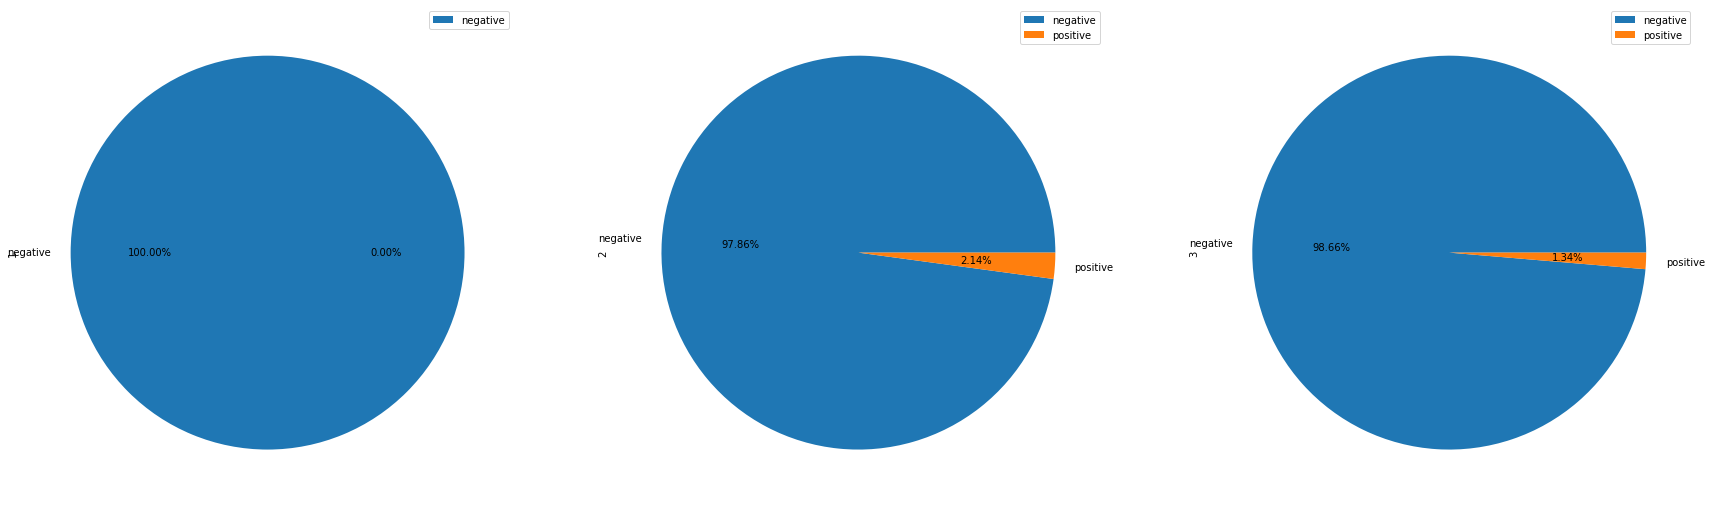

In [55]:
a=hyd.groupby(hyd['Age'])
a_wise= a['ELISA'].agg([('negative', neg),
                         ('positive', pos)
                          ])
print(a_wise)
a_wise.T.plot.pie(subplots=True, figsize=(30, 10), autopct='%1.2f%%')

In [56]:
a=hyd.groupby(hyd['Age'])
a_wise= a['ELISA'].agg([('negative', neg),
                         ('positive', pos)
                          ])
positive=a_wise.to_numpy(dtype=int)
positive

array([[  4,   0],
       [183,   4],
       [147,   2]])

In [57]:
hyd.groupby('Age').size()

Age
1      4
2    187
3    149
dtype: int64

In [58]:
total = [[4],[187],[149]]

          0         1
1  1.000000  0.000000
2  0.978610  0.021390
3  0.986577  0.013423


<AxesSubplot:>

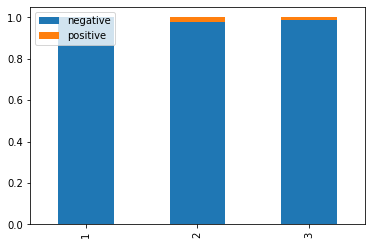

In [59]:
total = [[4],[187],[149]]
norm=positive/total
s = pd.Series([1, 2, 3])
z=pd.DataFrame(norm,s)
print(z)
z.rename(columns={0:'negative', 1:'positive'},  inplace = True)
z.plot.bar(stacked=True)

          0
1  0.000000
2  0.021390
3  0.013423


<AxesSubplot:>

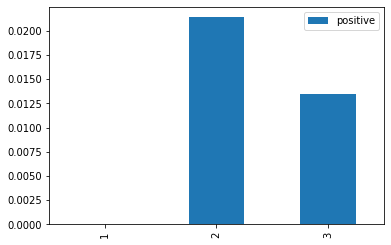

In [60]:
a_wise= a['ELISA'].agg([('positive', pos)
                          ])
positive=a_wise.to_numpy(dtype=int)
norm=positive/total
s = pd.Series([1, 2, 3])
z=pd.DataFrame(norm,s)
print(z)
z.rename(columns={0:'positive'},  inplace = True)
z.plot.bar()

In [61]:
x=data.groupby(['City','Year'])
tot = lambda col : col.count()
s=x['ELISA'].agg([('Total number of samples', tot),('Negative Samples', neg),('Positive Samples', pos)])
print(s)

                Total number of samples  Negative Samples  Positive Samples
City      Year                                                             
Bangalore 2013                    200.0             179.0              21.0
          2014                    133.0             127.0               6.0
          2018                    176.0             154.0              22.0
Calcutta  2013                    193.0             147.0              46.0
          2017                    410.0             381.0              29.0
          2018                     86.0              76.0              10.0
Delhi     2014                    400.0             357.0              43.0
          2018                     43.0              40.0               3.0
Hyderabad 2013                    540.0             530.0              10.0
          2014                    458.0             444.0              14.0
          2018                    309.0             280.0              29.0
Madras    20

<AxesSubplot:ylabel='None'>

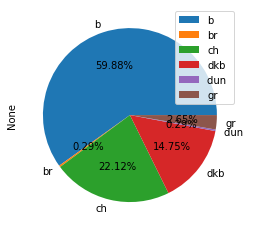

In [62]:
hyd.groupby('Color').size().plot(kind='pie', legend=True, autopct='%1.2f%%')

       negative  positive
Color                    
b         201.0       2.0
br          1.0       0.0
ch         72.0       3.0
dkb        49.0       1.0
dun         1.0       0.0
gr          9.0       0.0


array([<AxesSubplot:ylabel='b'>, <AxesSubplot:ylabel='br'>,
       <AxesSubplot:ylabel='ch'>, <AxesSubplot:ylabel='dkb'>,
       <AxesSubplot:ylabel='dun '>, <AxesSubplot:ylabel='gr'>],
      dtype=object)

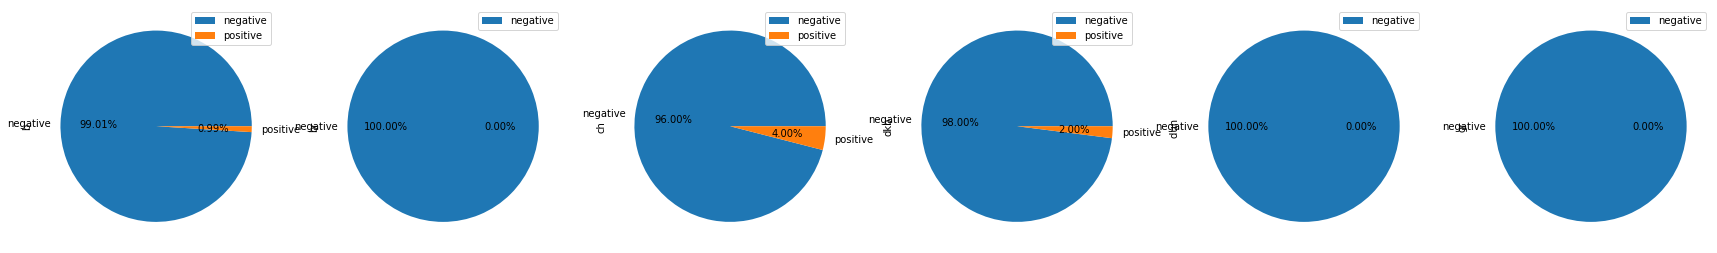

In [63]:
a=hyd.groupby(hyd['Color'])
a_wise= a['ELISA'].agg([('negative', neg),
                         ('positive', pos)
                          ])
print(a_wise)
a_wise.T.plot.pie(subplots=True, figsize=(30, 10), autopct='%1.2f%%')

In [64]:
positive=a_wise.to_numpy(dtype=int)

In [65]:
hyd.groupby('Color').size()

Color
b       203
br        1
ch       75
dkb      50
dun       1
gr        9
dtype: int64

                   0         1
bay         0.990148  0.009852
br          1.000000  0.000000
chestnut    0.960000  0.040000
dark brown  0.980000  0.020000
dun         1.000000  0.000000
gr          1.000000  0.000000


<AxesSubplot:>

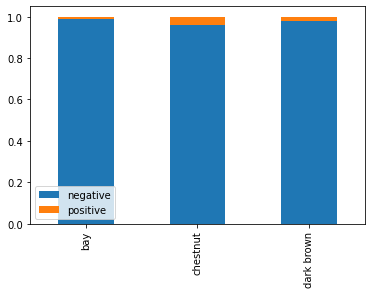

In [66]:
total=[[203],[1],[75],[50],[1],[9]]
norm=positive/total
s = pd.Series(["bay", "br", "chestnut","dark brown","dun","gr"])
z=pd.DataFrame(norm,s)
print(z)
z.rename(columns={0:'negative', 1:'positive'},  inplace = True)
z.drop(["br","dun","gr"], axis=0, inplace=True)
z.plot.bar(stacked=True)